# Mushroom Classification

In this project, using the dataset from [Kaggle](https://www.kaggle.com/code/mohamedzayton/mushroom-classification-rf/data), we will use Machine Learning to classify mushrooms.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

## Load the data

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
# Check missing data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing data in the dataset.

In [5]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

### Encode categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder

def encode_feature(feature):
    le = LabelEncoder()
    encoded_feature = le.fit_transform(feature)
    return encoded_feature

for col in df.columns:
    df[str(col)] = encode_feature(df[str(col)])
    
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

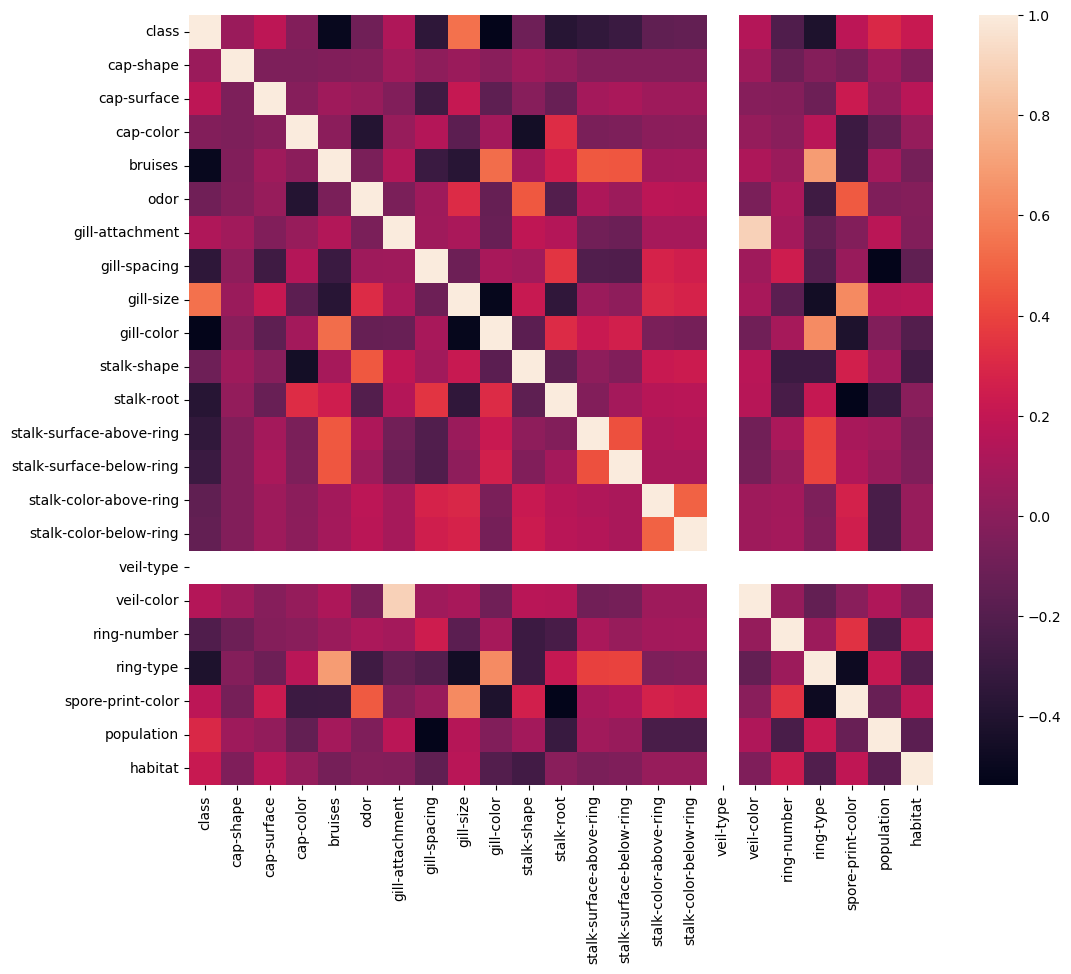

In [9]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

/var/folders/wt/p6z8f48x2513vdyj3dw3zz_h0000gn/T/ipykernel_1021/2555487093.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


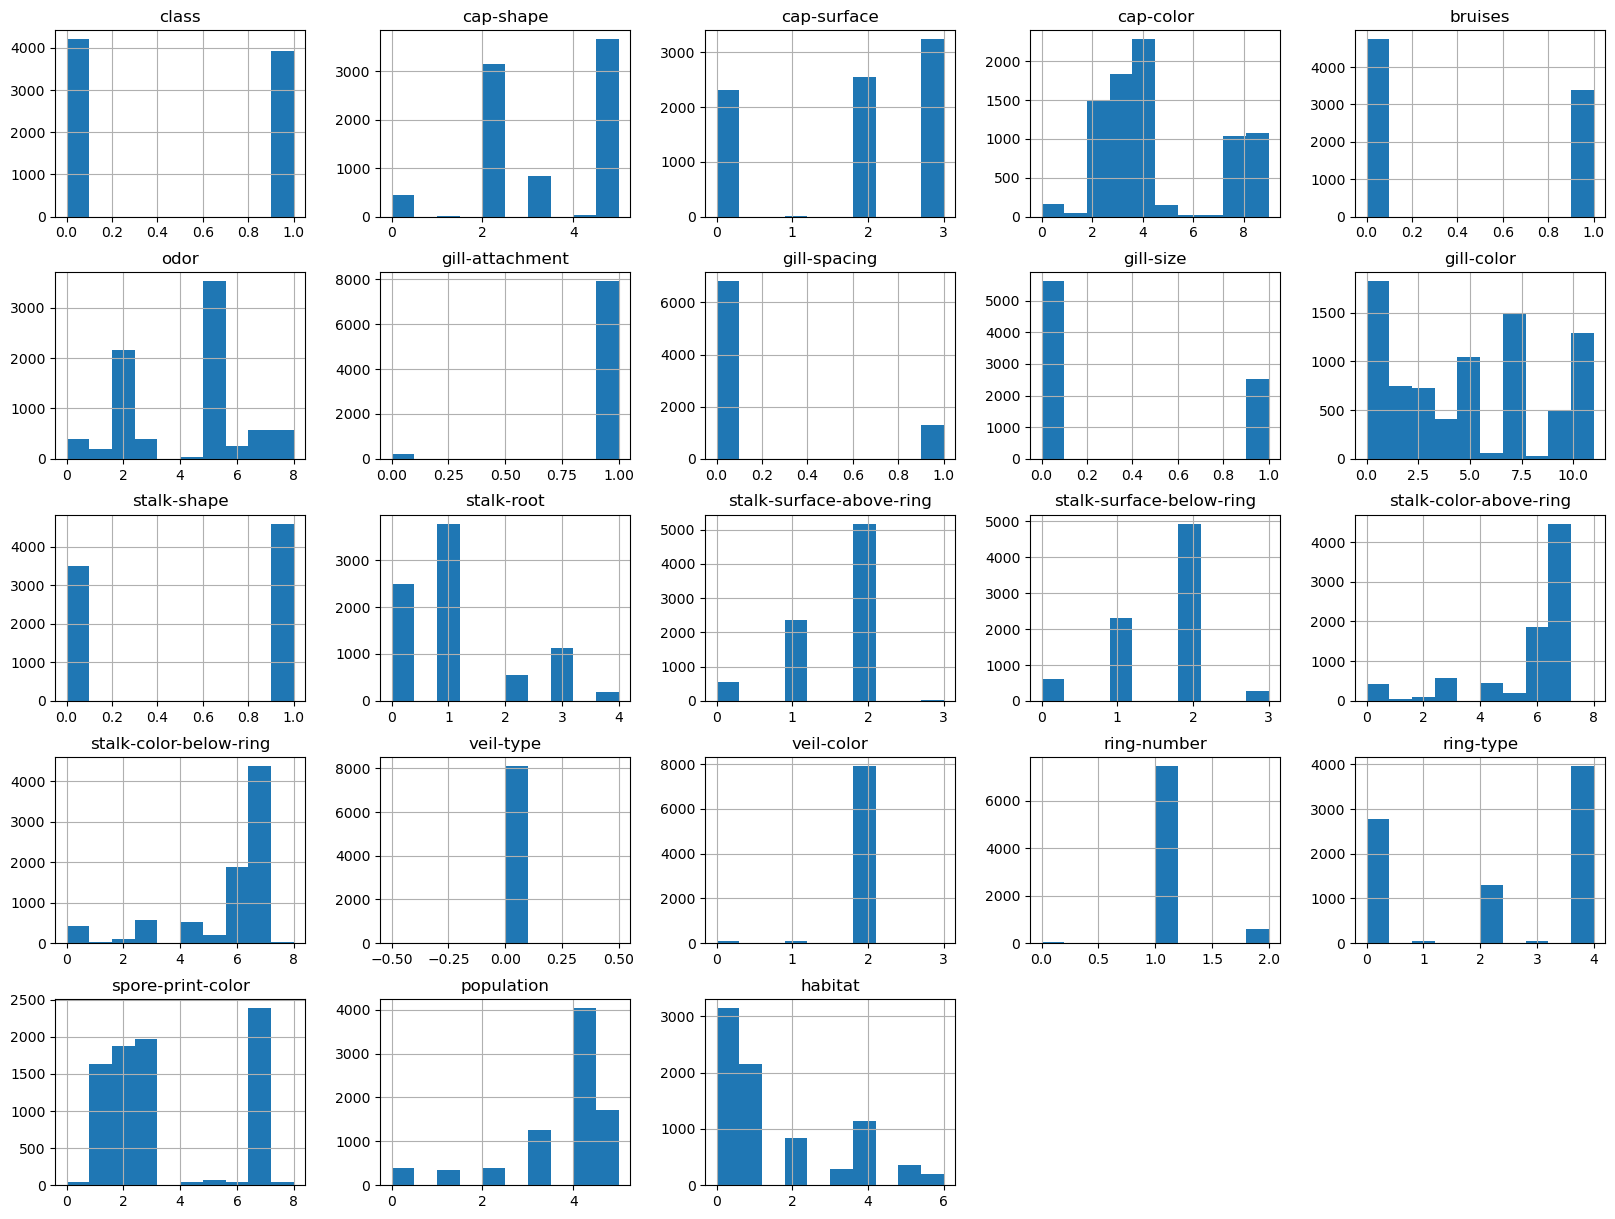

In [10]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

We can remove the less correlated data, useless to build our model.

In [12]:
X = df.drop(['class','veil-type','gill-attachment','ring-type','gill-color','bruises'],axis=1)
y = df['class']

### Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Build the model

### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [15]:
y_pred = forest.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

1.0

Let's try building a model using all the features.

In [17]:
X = df.drop(['class'],axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [20]:
forest_2 = RandomForestClassifier(max_depth=100)
forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=100)

In [22]:
y_pred = forest_2.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

1.0

### Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
X = df.drop(['class','veil-type','gill-attachment','ring-type','gill-color','bruises'], axis=1)
y = df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
# Inizialize the NN
model_NN = Sequential()

# Input layer and first hidden layer
model_NN.add(Dense(32, input_dim=17, activation='tanh'))

# Second hidden layer
model_NN.add(Dense(16, activation='tanh'))

# Output layer
model_NN.add(Dense(1, activation='softmax'))

# Compile model
model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)

In [ ]:
# Train the NN
model_NN.fit(x=X_train, y=y_train, epochs=500,
             #batch_size=200,
             validation_data=(X_test, y_test),
             callbacks=[early_stop]
            )

In [ ]:
model_NN.evaluate(X_test, y_test)

In [ ]:
pred = model_NN.predict(X_test)
y_test.iloc[9]

In [ ]:
model_NN.predict(np.array([X_test.iloc[9]]))